In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style as style
style.use(u'mystyle')    #为能够正常显示汉字和使用ggplot风格，这里使用自定义的图像风格
%matplotlib notebook

### 读取成绩文件
- score1：初试成绩
- score2：复试成绩
- total：归一化总成绩

In [2]:
data = pd.read_excel('dy2016.xlsx')
data.head()

,id,name,score1,score2,total,major_id,major,teacher,scholarship,type1,type2,other
0,7014,刘超,449,60,90,85208,电子与通信工程,吴艳,二等,定向就业,强军计划,强军计划
1,7016,肖瑞,434,60,88,85208,电子与通信工程,朱明哲,无,定向就业,强军计划,强军计划
2,7015,王巍峰,414,73,90,85208,电子与通信工程,尹应增,无,定向就业,强军计划,强军计划
3,1377,王跃霖,410,100,100,80904,电磁场与微波技术,吴边,一等,非定向就业,全国统考,优研计划
4,7013,马泽军,410,60,84,85208,电子与通信工程,赵国庆,无,定向就业,强军计划,强军计划


### 统计数据
- 平均成绩
- 最低、最高成绩
- 方差等

In [3]:
data.describe()

,id,score1,score2,total
count,546.000000,546.000000,546.000000,546.000000
mean,2551.816850,337.476190,80.184982,81.831502
std,1802.401584,28.774868,8.387881,6.315918
min,327.000000,265.000000,60.000000,63.000000
25%,1021.250000,317.250000,75.000000,77.000000
50%,1359.500000,335.000000,81.000000,82.000000
75%,4254.500000,358.000000,86.000000,86.000000
max,8620.000000,449.000000,100.000000,100.000000


### 奖学金统计

In [4]:
pd.DataFrame(data.scholarship.value_counts()).T

,二等,一等,无,请关注空间学院网站,请关注网络与安全学院网站
scholarship,287,126,125,6,2


<IPython.core.display.Javascript object>


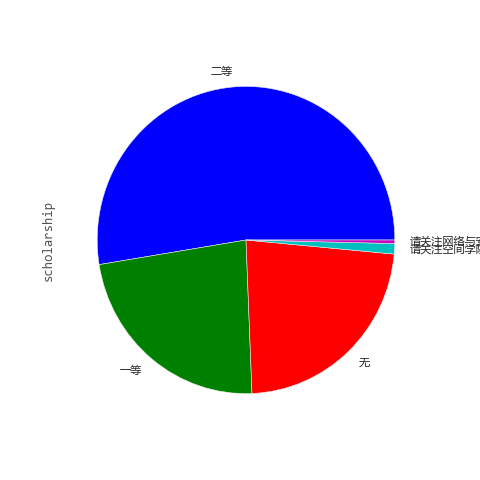

In [5]:
plt.figure(figsize=(6,6))
data.scholarship.value_counts().plot(kind = 'pie')
plt.show()

### 录取人数最多的前20位老师

In [6]:
pd.DataFrame(data.teacher.value_counts().head(20)).T

,傅光,尹应增,邓成,赵国庆,龚书喜,武斌,吴艳,廖桂生,李龙,谢雪梅,焦永昌,李明,吴边,路宏敏,史琰,张林让,鲍丹,罗丰,全英汇,苏涛
teacher,8,7,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5


### 各类考生统计

In [7]:
pd.DataFrame(data.other.value_counts()).T

,优研计划,校外调剂,创新实践基金联合培养项目,昆山研究院,强军计划,北京六所联合培养,电科院联合培养,优研计划、二十九所联合培,二十九所联合培养,优研计划、昆山研究院
other,237,26,13,13,4,2,2,1,1,1


In [8]:
print " 其他考生：%d人" % (len(data) - data.other.count())

 其他考生：246人


### 初试成绩直方图
其中300为为复试分数线，低于300的为优研计划学生

<IPython.core.display.Javascript object>


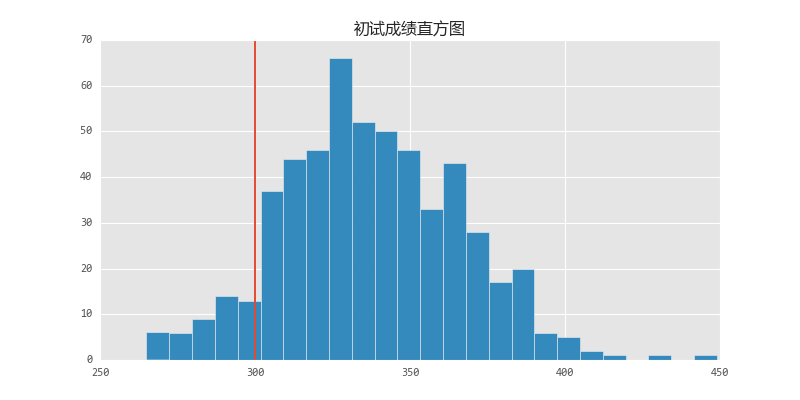

In [9]:
plt.figure(figsize=(10,5))
data.score1.hist(bins = 25, color='#348ABD')
plt.hold(1)
plt.plot([300,300],[0,70],'#E24A33')
plt.title(u'初试成绩直方图')
plt.show()

### 总成绩直方图

<IPython.core.display.Javascript object>


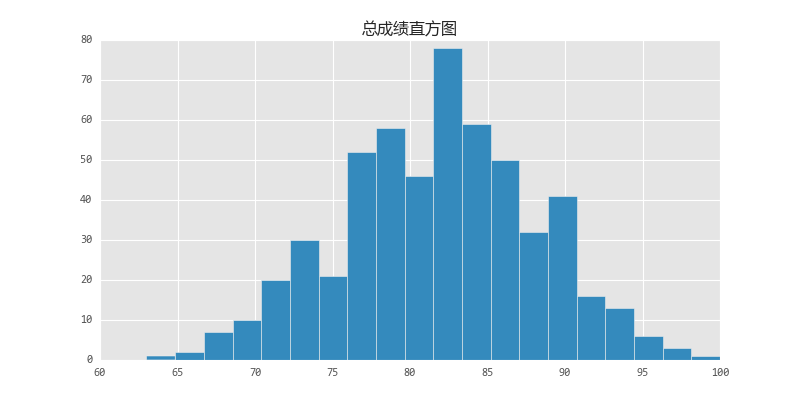

In [10]:
plt.figure(figsize=(10,5))
data.total.hist(bins = 20, color='#348ABD')
plt.title(u'总成绩直方图')
plt.show()

### 相关性分析
总成绩与初试复试成绩明显线性相关
     
     总成绩 = 50% * 初试 + %50 * 复试
     
复试成绩与初试有一定关联

<IPython.core.display.Javascript object>


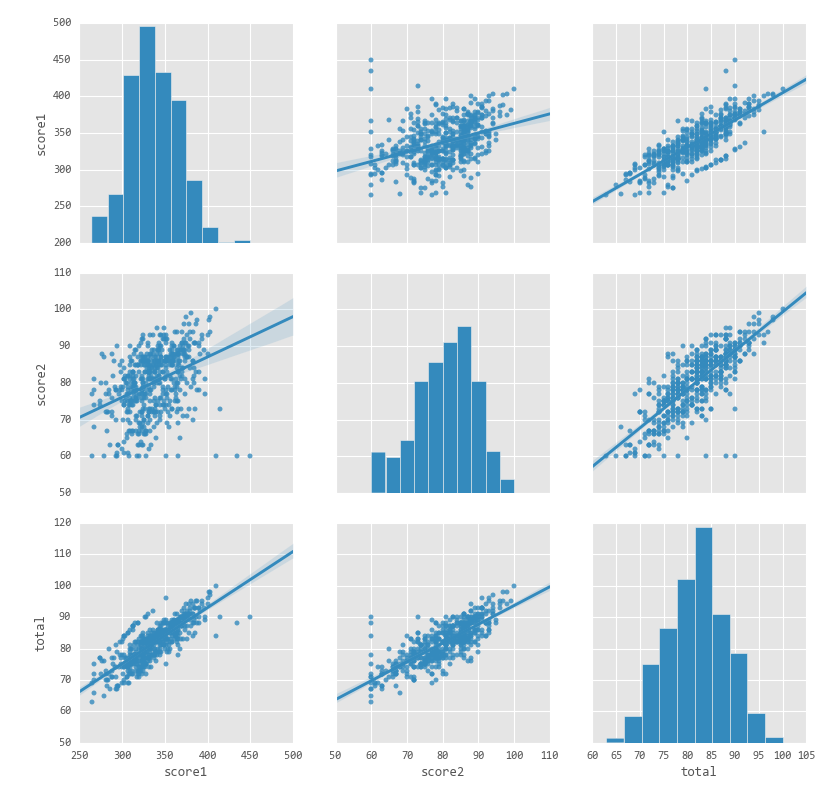

In [11]:
sns.pairplot(data, vars=['score1', 'score2', 'total'], kind="reg")
plt.show()

### 奖学金分布

<IPython.core.display.Javascript object>


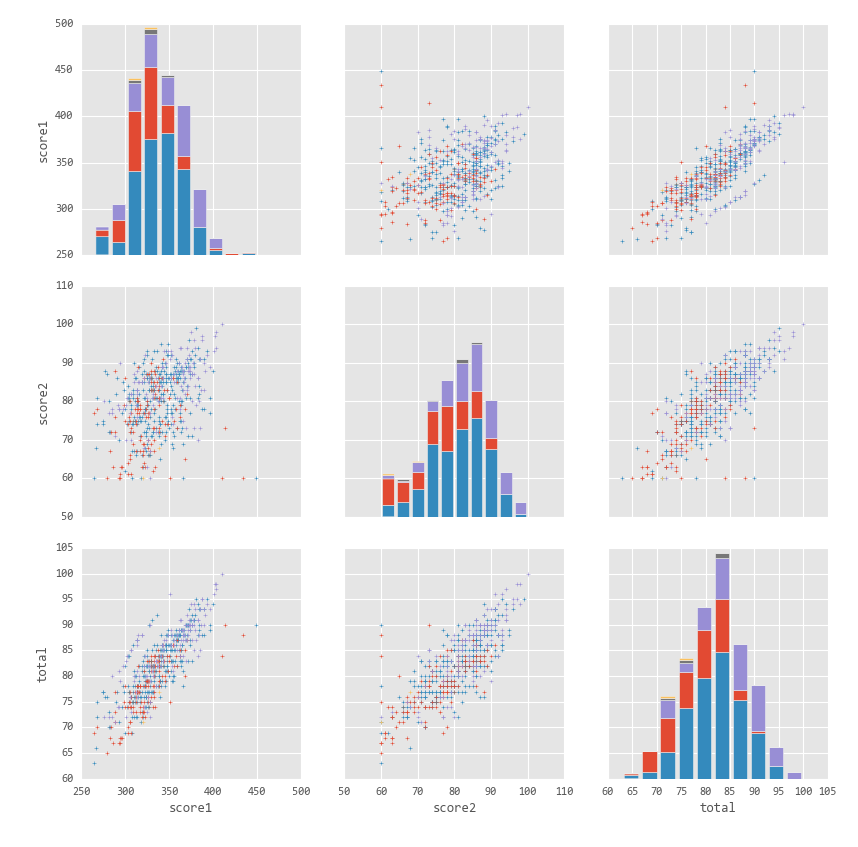

In [12]:
try:
    sns.pairplot(data, vars=['score1', 'score2', 'total'], hue='scholarship', markers='+')
except:
    plt.show()

### 考生类别分布

<IPython.core.display.Javascript object>


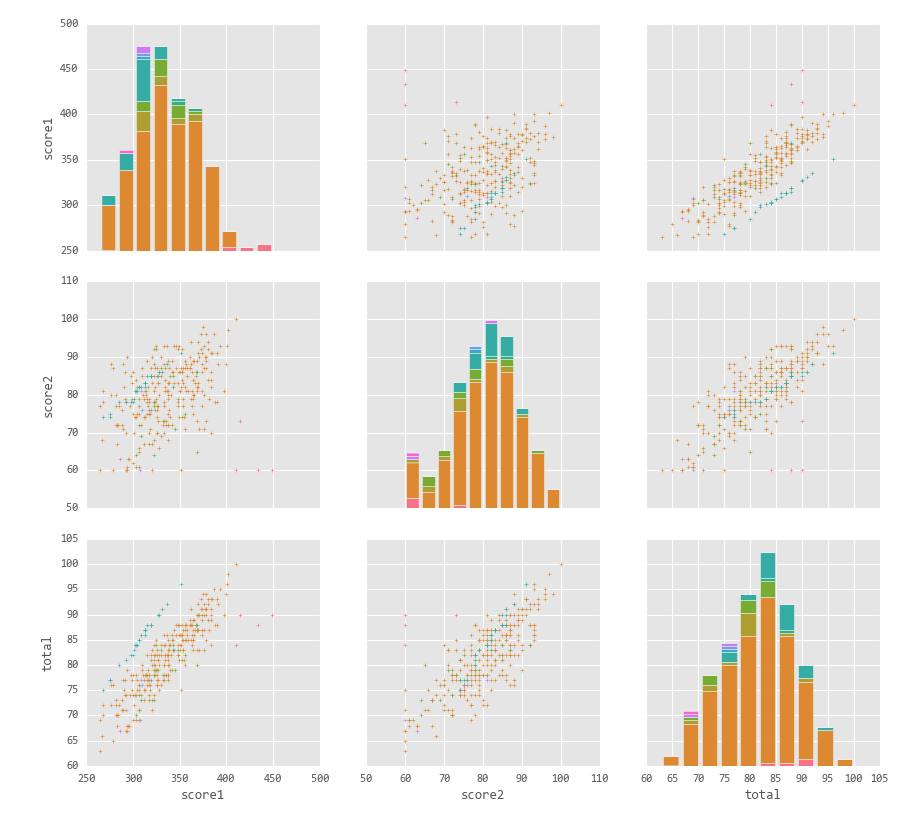

In [13]:
try:
    a = sns.pairplot(data, vars=['score1', 'score2', 'total'], hue='other', markers='+')
except:
    plt.show()